# Colorisation using Deep Learning : 


# 2(a.) Downloading data and visualising train and test features :


In [7]:
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

In [8]:
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
from keras.utils import np_utils

In [9]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

# All classes of data : total 10

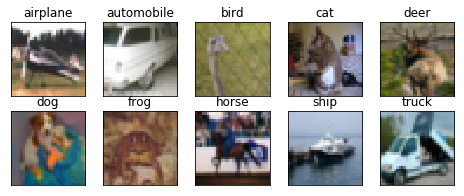

In [10]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::], (1, 2, 0))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [11]:
train_features.shape, test_labels.shape

((50000, 3, 32, 32), (10000, 1))

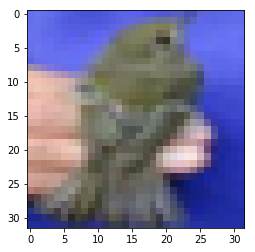

In [12]:
idx = np.where(train_labels[:]==2)[0]
features_idx = train_features[idx,::]
img_num = np.random.randint(features_idx.shape[0])
im = np.transpose(features_idx[img_num,::], (1, 2, 0))
ax.set_title(class_names[i])
plt.imshow(im)
plt.show()

# Only class bird where label ==2

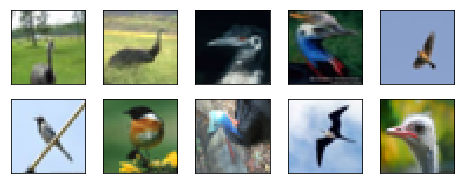

In [13]:
fig = plt.figure(figsize=(8,3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==2)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::], (1, 2, 0))
    plt.imshow(im)
plt.show()

# B. Mixing test and train dataset

In [14]:
X=np.vstack((train_features,test_features))
y=np.vstack((train_labels,test_labels))

In [15]:
X.shape, y.shape

((60000, 3, 32, 32), (60000, 1))

In [16]:
idx=np.where(train_labels[:]==2)[0]
idx1=np.where(test_labels[:]==2)[0]

In [17]:
tx1=train_features[idx]
tx_labels=train_labels[idx]

In [18]:
tx2=test_features[idx1]
tx2_labels=test_labels[idx1]

In [19]:
x=np.vstack((tx1,tx2))
y=np.vstack((tx_labels,tx2_labels))

# (c.) Calculating the total pixel values i.e. 6000*32*32 

In [20]:
x.shape, y.shape

((6000, 3, 32, 32), (6000, 1))

In [21]:
X=x.reshape((6144000,3))

# Shaping X for Kmeans 

In [22]:
X.shape

(6144000, 3)

# ( d.)  Running k means using k = 4 . 

In [23]:
from sklearn.cluster import KMeans

In [24]:
kmeans=KMeans(n_clusters=4)
kmeans=kmeans.fit(X)

# The centers of the clusters are main colors!

In [25]:
kmeans.cluster_centers_

array([[100.14239266,  98.90672031, 100.10756064],
       [211.89446106, 215.01015118, 211.89181626],
       [ 46.63063721,  43.80261964,  46.62660085],
       [150.19876658, 152.16994958, 150.20111811]])

In [27]:
X1=X

In [28]:
X1.shape

(6144000, 3)

In [29]:
for i in range(len(X)):
    X1[i] = kmeans.cluster_centers_[kmeans.labels_[i]]

In [30]:
X1.shape

(6144000, 3)

In [31]:
vis=X1.reshape((6000,3,32,32)).transpose(0, 2, 3, 1)

# Lets check birds after kmeans 

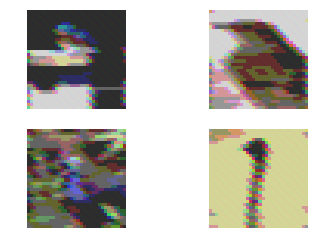

In [36]:
for i in range(0,4):
    axis1=plt.subplot(2,2,i+1)
    a=vis[i+1]
    
    axis1.imshow(a)
    plt.axis('off')
plt.show()

# e. Lets visualise some birds after convering to gray scale :

In [37]:
import keras

In [38]:
y1=keras.utils.to_categorical(kmeans.labels_).reshape((6000,32,32,4))

In [39]:
X=X.reshape((6000,3,32,32)).transpose(0, 2, 3, 1)

In [40]:
from skimage.color import rgb2grey

In [41]:
X_N=[]
for i in range(len(X)):
    X_N.append(rgb2grey(X[i]).tolist())

In [42]:
ip=np.array(X_N)

In [43]:
ip.shape

(6000, 32, 32)

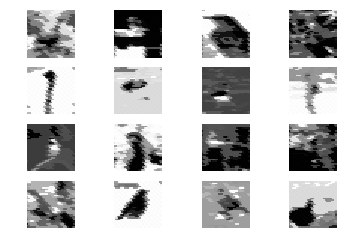

In [44]:
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = ip[i]
    #arr.reshape((6000,3,32,32)).transpose(0, 2, 3, 1)
    axis.imshow(arr,cmap='gray')
    plt.axis('off')
plt.show()

# f. set MLP layers after reshapinng

In [45]:
x1=ip.reshape((6000,32,32,1))

In [46]:
x1.shape

(6000, 32, 32, 1)

In [47]:
y1.shape

(6000, 32, 32, 4)

In [48]:
c.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.1, random_state=10)

In [51]:
X_train.shape,y_train.shape

((5400, 32, 32, 1), (5400, 32, 32, 4))

In [2]:
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.models import Sequential
c = Sequential()
c.add(Conv2D(64, kernel_size = (5,5), strides=(1, 1), padding='same', input_shape = (32,32,1)))
c.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
c.add(Conv2D(64, kernel_size = (5,5), strides=(1, 1), padding='same'))
c.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
c.add(Dense(32, activation='softmax'))
c.add(Dense(4, activation='softmax'))
c.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1664      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        102464    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dense_3 (Dense)              (None, 32, 32, 32)        2080      
_________________________________________________________________
dense_4 (Dense)              (None, 32, 32, 4)         132       
Total params: 106,340
Trainable params: 106,340
Non-trainable params: 0
_________________________________________________________________


In [52]:
history=c.fit(X_train, y_train, epochs=20, validation_split=0.1)

Train on 4860 samples, validate on 540 samples
Epoch 1/20
4860/4860 [==============================] - 56s 12ms/step - loss: 1.3046 - acc: 0.3742 - val_loss: 1.2676 - val_acc: 0.4272
Epoch 2/20
4860/4860 [==============================] - 59s 12ms/step - loss: 1.2530 - acc: 0.4241 - val_loss: 1.2401 - val_acc: 0.4254
Epoch 3/20
4860/4860 [==============================] - 60s 12ms/step - loss: 1.2366 - acc: 0.4222 - val_loss: 1.2249 - val_acc: 0.4342
Epoch 4/20
4860/4860 [==============================] - 61s 13ms/step - loss: 1.2205 - acc: 0.4263 - val_loss: 1.2095 - val_acc: 0.4323
Epoch 5/20
4860/4860 [==============================] - 63s 13ms/step - loss: 1.2117 - acc: 0.4385 - val_loss: 1.2058 - val_acc: 0.4700
Epoch 6/20
4860/4860 [==============================] - 63s 13ms/step - loss: 1.2056 - acc: 0.4599 - val_loss: 1.1932 - val_acc: 0.4729
Epoch 7/20
4860/4860 [==============================] - 63s 13ms/step - loss: 1.2014 - acc: 0.4609 - val_loss: 1.1984 - val_acc: 0.4648
E

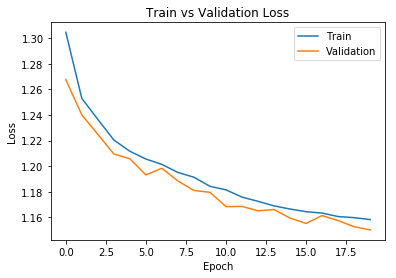

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [54]:
pred=c.predict(X_test)

In [55]:
pred.shape

(600, 32, 32, 4)

In [56]:
predictions = pred.reshape((614400,4))

In [57]:
pred = predictions[:,0:3]

In [58]:
for i in range(len(predictions)):
    pred[i] = kmeans.cluster_centers_[np.argmax(predictions[i])].tolist()

In [59]:
pred = pred.reshape((600,32,32,3))

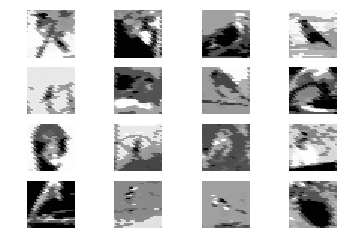

In [60]:
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = X_test.reshape(600,32,32)[i]
    axis.imshow(arr,cmap='gray')
    plt.axis('off')
plt.show()

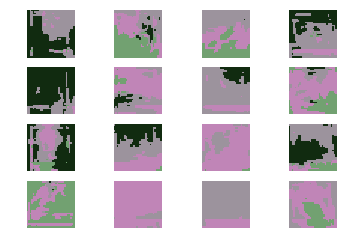

In [61]:
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = pred[i]
    axis.imshow((arr * 255).astype(np.uint8))
    plt.axis('off')
plt.show()
